In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# # print(np.min(train_images[0]))
# print(np.max(train_images[0]))
# train_images.shape
test_images.shape

(10000, 28, 28)

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

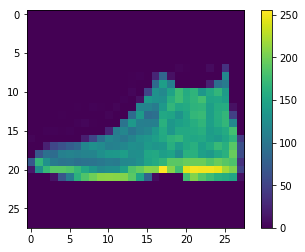

In [6]:
plt.imshow(test_images[0])
plt.colorbar()

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[train_labels[i]])
# plt.show()

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dropout(.25),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(.25),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [33]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model.fit(train_images, train_labels, epochs=20, batch_size=1024)

Epoch 1/20
60000/60000 [==============================] - 2s 41us/step - loss: 1.0186 - acc: 0.6406
Epoch 2/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.6253 - acc: 0.7827
Epoch 3/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.5512 - acc: 0.8077
Epoch 4/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.5147 - acc: 0.8197
Epoch 5/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.4875 - acc: 0.8265
Epoch 6/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.4678 - acc: 0.8343
Epoch 7/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.4541 - acc: 0.8382
Epoch 8/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.4401 - acc: 0.8447
Epoch 9/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.4294 - acc: 0.8470
Epoch 10/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.4221 - acc: 0.8491

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 52us/step
Test accuracy: 0.852


In [21]:
predictions = model.predict(test_images)

In [22]:
predictions[0]

array([1.5807960e-07, 1.7563787e-09, 1.9425875e-10, 7.0553835e-10,
       2.6129454e-10, 4.1644383e-02, 4.8660840e-09, 1.2727344e-01,
       7.7239447e-06, 8.3107430e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [24]:
test_labels[0]

9

In [25]:
# Data Sc
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array) 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

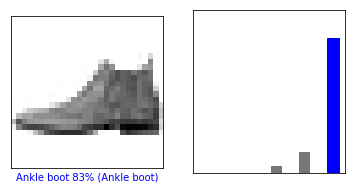

In [26]:
# Data Sc
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

[4]
Coat


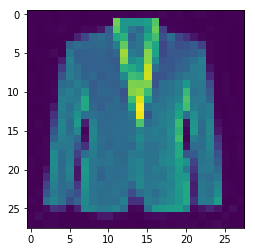

In [35]:
import cv2
gray = cv2.imread("coat.jpg", cv2.IMREAD_GRAYSCALE)
# plt.imshow(gray)
gray = cv2.resize(255-gray, (28, 28))
plt.imshow(gray)
gray = gray/255
pr = model.predict_classes(gray.reshape(1, 28, 28))
print(pr)
print(class_names[pr[0]])
